In [1]:
import numpy as np
import igraph
from scipy import sparse
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
from bluepy import Circuit
import matplotlib.patches as mpatches
from scipy.sparse import csc_matrix
import tqdm
import os

In [2]:
dpi=300
file_format = 'pdf'
fig_save_dir = f'../output/hubs'
os.makedirs(fig_save_dir, exist_ok=True)

In [3]:
target = 'slice10'
adj_path = f'/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/data/ca1_ca3_to_{target}_synaptome.npz'

In [4]:
adj = sparse.load_npz(adj_path)
adj = adj[:adj.shape[1],:]

In [5]:
connectome = adj.copy()
connectome[connectome>1]=1

In [6]:
indegrees = adj.sum(axis=0).flatten().A[0]
outdegrees = adj.sum(axis=1).flatten().A[0]
total_degrees = indegrees + outdegrees

## Hubs

## All Network

In [7]:
group = 'All connections'
inhub_threshold = np.round(np.mean(indegrees) + np.std(indegrees))
outhub_threshold = np.round(np.mean(outdegrees) + np.std(outdegrees))
tothub_threshold = np.round(np.mean(total_degrees) + np.std(total_degrees))
print(f'{group}\ninhub threshold (mean + 1 std): {inhub_threshold}\nOuthub threshold (mean + 1 std): {outhub_threshold}')
print(f'total hub threshold (mean + 1 std): {tothub_threshold}')

num_inhubs = len(np.where(indegrees>inhub_threshold)[0])
num_outhubs = len(np.where(outdegrees>outhub_threshold)[0])
num_tothubs = len(np.where(total_degrees>tothub_threshold)[0])

inhub_percentage = np.round(100*num_inhubs/indegrees.shape[0],2)
outhub_percentage = np.round(100*num_outhubs/outdegrees.shape[0],2)
tothub_percentage = np.round(100*num_tothubs/total_degrees.shape[0],2)

print(f'There are {num_inhubs} ({inhub_percentage}%) inhubs and {num_outhubs} ({outhub_percentage}%) outhubs.')
print(f'There are {num_tothubs} ({tothub_percentage}%) total hubs.')

All connections
inhub threshold (mean + 1 std): 1925.0
Outhub threshold (mean + 1 std): 4215.0
total hub threshold (mean + 1 std): 5817.0
There are 1274 (10.1%) inhubs and 969 (7.68%) outhubs.
There are 1091 (8.65%) total hubs.


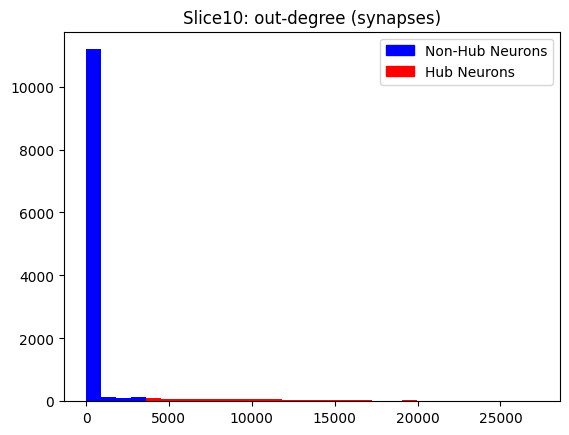

In [8]:
group = 'All connections'
degree_type = 'out'


if degree_type == 'in':
    threshold = inhub_threshold
    n, bins, patches = plt.hist(indegrees,bins=30,color='blue')
elif degree_type == 'out':
    threshold = outhub_threshold
    n, bins, patches = plt.hist(outdegrees,bins=30,color='blue')
elif degree_type == 'total':
    threshold = tothub_threshold
    n, bins, patches = plt.hist(total_degrees,bins=30,color='blue')

plt.title(f'Slice10: {degree_type}-degree (synapses)')

red_patch = mpatches.Patch(color='red', label='Bins > Threshold')
plt.legend(handles=[red_patch])


# Iterate over the patches and set color for bins higher than the threshold
red_patches = []
non_red_patches = []
for i in range(len(patches)):
    if bins[i + 1] > threshold:
        patches[i].set_facecolor('red')
        red_patches.append(patches[i])
    else:
        non_red_patches.append(patches[i])

# Create legend patches
red_patch = mpatches.Patch(color='red', label='Hub Neurons')
non_red_patch = mpatches.Patch(color='blue', label='Non-Hub Neurons')

# Add the legend to the plot
plt.legend(handles=[non_red_patch,red_patch])
# plt.scale('log')
plt.savefig(f'{fig_save_dir}/{target}_syn_{degree_type}degree.{file_format}',dpi=dpi,format=file_format)

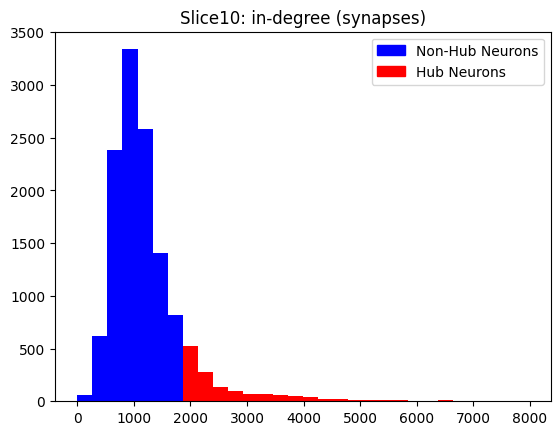

In [9]:
group = 'All connections'
degree_type = 'in'


if degree_type == 'in':
    threshold = inhub_threshold
    n, bins, patches = plt.hist(indegrees,bins=30,color='blue')
elif degree_type == 'out':
    threshold = outhub_threshold
    n, bins, patches = plt.hist(outdegrees,bins=30,color='blue')
elif degree_type == 'total':
    threshold = tothub_threshold
    n, bins, patches = plt.hist(total_degrees,bins=30,color='blue')

plt.title(f'Slice10: {degree_type}-degree (synapses)')

red_patch = mpatches.Patch(color='red', label='Bins > Threshold')
plt.legend(handles=[red_patch])


# Iterate over the patches and set color for bins higher than the threshold
red_patches = []
non_red_patches = []
for i in range(len(patches)):
    if bins[i + 1] > threshold:
        patches[i].set_facecolor('red')
        red_patches.append(patches[i])
    else:
        non_red_patches.append(patches[i])

# Create legend patches
red_patch = mpatches.Patch(color='red', label='Hub Neurons')
non_red_patch = mpatches.Patch(color='blue', label='Non-Hub Neurons')

# Add the legend to the plot
plt.legend(handles=[non_red_patch,red_patch])
plt.savefig(f'{fig_save_dir}/{target}_syn_{degree_type}degree.{file_format}',dpi=dpi,format=file_format)


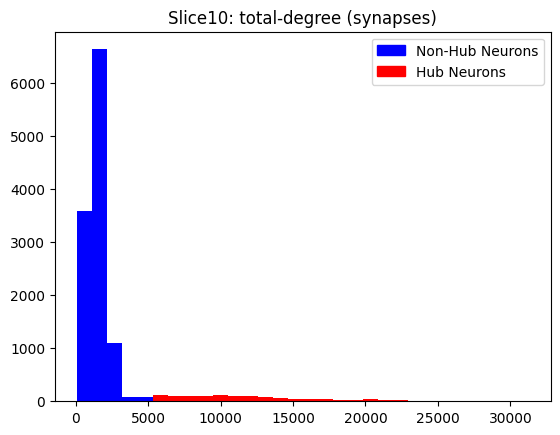

In [10]:
group = 'All'
degree_type = 'total'


if degree_type == 'in':
    threshold = inhub_threshold
    n, bins, patches = plt.hist(indegrees,bins=30,color='blue')
elif degree_type == 'out':
    threshold = outhub_threshold
    n, bins, patches = plt.hist(outdegrees,bins=30,color='blue')
elif degree_type == 'total':
    threshold = tothub_threshold
    n, bins, patches = plt.hist(total_degrees,bins=30,color='blue')

plt.title(f'Slice10: {degree_type}-degree (synapses)')

red_patch = mpatches.Patch(color='red', label='Bins > Threshold')
plt.legend(handles=[red_patch])


# Iterate over the patches and set color for bins higher than the threshold
red_patches = []
non_red_patches = []
for i in range(len(patches)):
    if bins[i + 1] > threshold:
        patches[i].set_facecolor('red')
        red_patches.append(patches[i])
    else:
        non_red_patches.append(patches[i])

# Create legend patches
red_patch = mpatches.Patch(color='red', label='Hub Neurons')
non_red_patch = mpatches.Patch(color='blue', label='Non-Hub Neurons')

# Add the legend to the plot
plt.legend(handles=[non_red_patch,red_patch])
plt.savefig(f'{fig_save_dir}/{target}_syn_{degree_type}degree.{file_format}',dpi=dpi,format=file_format)
# plt.xscale('log')

## EXC Subnetwork Hubs

In [28]:
from bluepy import Circuit
from pathlib import Path

CIRCUIT_DIR = Path('/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/')
c = Circuit((CIRCUIT_DIR / 'CircuitConfig').as_posix())

In [29]:
#PCPC degrees
target_idx = np.intersect1d(c.cells.ids('SP_PC'),c.cells.ids('slice10'))-1

In [31]:
target_indices_in_adj = np.where(np.isin(c.cells.ids('slice10')-1,target_idx))[0]

In [32]:
target_exc_to_all = adj[target_indices_in_adj,:]
target_exc_to_exc = target_exc_to_all[:,target_indices_in_adj]

In [38]:
indegrees_EXC = target_exc_to_exc.sum(axis=1).A.flatten()
outdegrees_EXC = target_exc_to_exc.sum(axis=0).A.flatten()
total_degrees_EXC = indegrees_EXC + outdegrees_EXC

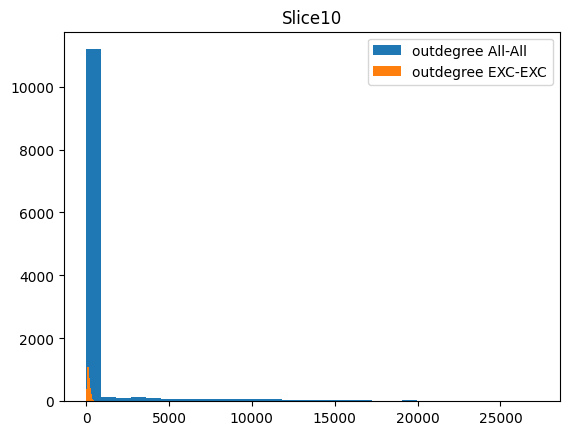

In [40]:

_=plt.hist(outdegrees,bins=30)
_=plt.hist(outdegrees_EXC,bins=30)
plt.legend(['outdegree All-All','outdegree EXC-EXC'])
plt.title('Slice10')
plt.savefig(f'{fig_save_dir}/outdegree_EXC-EXC.{file_format}',dpi=dpi,format=file_format)

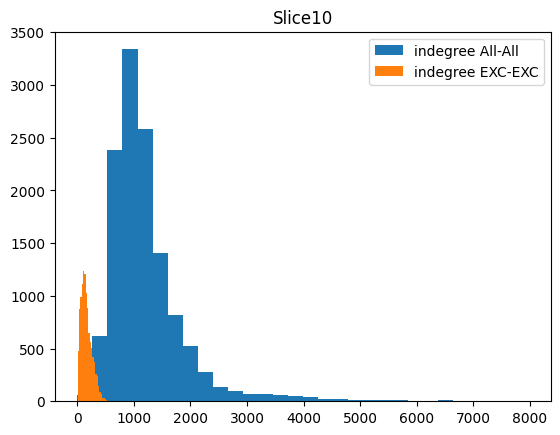

In [41]:
_=plt.hist(indegrees,bins=30)
_=plt.hist(indegrees_EXC,bins=30)
plt.legend(['indegree All-All','indegree EXC-EXC'])
plt.title('Slice10')
plt.savefig(f'{fig_save_dir}/indegree_EXC-EXC.{file_format}',dpi=dpi,format=file_format)
# plt.xscale('log')

In [42]:
inhub_threshold_EXC = np.round(np.mean(indegrees_EXC) + np.std(indegrees_EXC))
outhub_threshold_EXC = np.round(np.mean(outdegrees_EXC) + np.std(outdegrees_EXC))
tothub_threshold_EXC = np.round(np.mean(total_degrees_EXC) + np.std(total_degrees_EXC))
print(f'EXC\ninhub threshold (mean + 1 std): {inhub_threshold_EXC}\nouthub threshold (mean + 1 std): {outhub_threshold_EXC}')
print(f'tothub threshold (mean + 1 std): {tothub_threshold_EXC}')

num_EXC_inhubs = len(np.where(indegrees_EXC>inhub_threshold_EXC)[0])
num_EXC_outhubs = len(np.where(outdegrees_EXC>outhub_threshold_EXC)[0])
num_EXC_tothubs = len(np.where(total_degrees_EXC>tothub_threshold_EXC)[0])

inhub_percentage_EXC = np.round(100*num_EXC_inhubs/indegrees_EXC.shape[0],2)
outhub_percentage_EXC = np.round(100*num_EXC_outhubs/outdegrees_EXC.shape[0],2)
tothub_percentage_EXC = np.round(100*num_EXC_tothubs/total_degrees_EXC.shape[0],2)

print(f'There are {num_EXC_inhubs} ({inhub_percentage_EXC}%) EXC inhubs and {num_EXC_outhubs} ({outhub_percentage_EXC}%) EXC outhubs.')
print(f'There are {num_EXC_tothubs} ({tothub_percentage_EXC}%) EXC tothubs.')

EXC
inhub threshold (mean + 1 std): 258.0
outhub threshold (mean + 1 std): 253.0
tothub threshold (mean + 1 std): 454.0
There are 1874 (16.71%) EXC inhubs and 1715 (15.29%) EXC outhubs.
There are 1938 (17.28%) EXC tothubs.


In [46]:
import matplotlib.patches as mpatches


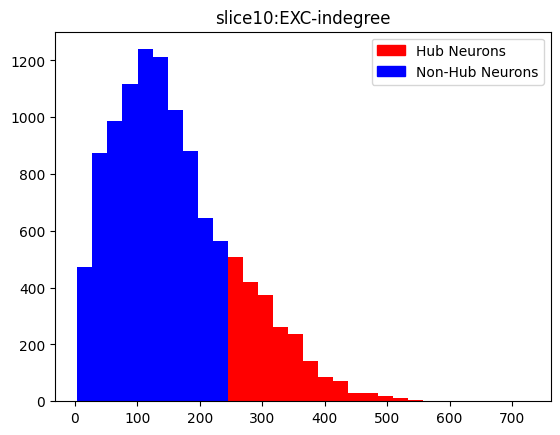

In [57]:
degree_type = 'in'
group = 'EXC'

if degree_type == 'in':
    n, bins, patches = plt.hist(indegrees_EXC,bins=30,color='blue')
    threshold = inhub_threshold_EXC
elif degree_type == 'out':
    n, bins, patches = plt.hist(outdegrees_EXC,bins=30,color='blue')
    threshold = outhub_threshold_EXC
elif degree_type == 'tot':
    n, bins, patches = plt.hist(total_degrees_EXC,bins=30,color='blue')
    threshold = tothub_threshold_EXC

plt.title(f"{target}:{group}-{degree_type}degree")

red_patch = mpatches.Patch(color='red', label='Bins > Threshold')
plt.legend(handles=[red_patch])

# Iterate over the patches and set color for bins higher than the threshold
red_patches = []
non_red_patches = []
for i in range(len(patches)):
    if bins[i + 1] > threshold:
        patches[i].set_facecolor('red')
        red_patches.append(patches[i])
    else:
        non_red_patches.append(patches[i])

# Create legend patches
red_patch = mpatches.Patch(color='red', label='Hub Neurons')
non_red_patch = mpatches.Patch(color='blue', label='Non-Hub Neurons')

# Add the legend to the plot
plt.legend(handles=[red_patch, non_red_patch])
plt.savefig(f'{fig_save_dir}/{target}_{group}_syn_{degree_type}degree.{file_format}',dpi=dpi,format=file_format)
# plt.xscale('log')

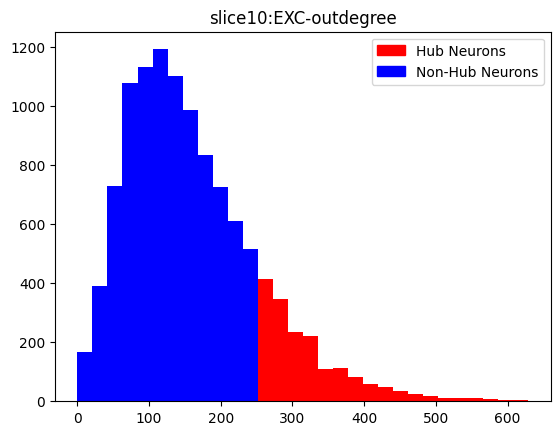

In [58]:
degree_type = 'out'
group = 'EXC'

if degree_type == 'in':
    n, bins, patches = plt.hist(indegrees_EXC,bins=30,color='blue')
    threshold = inhub_threshold_EXC
elif degree_type == 'out':
    n, bins, patches = plt.hist(outdegrees_EXC,bins=30,color='blue')
    threshold = outhub_threshold_EXC
elif degree_type == 'tot':
    n, bins, patches = plt.hist(total_degrees_EXC,bins=30,color='blue')
    threshold = tothub_threshold_EXC

plt.title(f"{target}:{group}-{degree_type}degree")

red_patch = mpatches.Patch(color='red', label='Bins > Threshold')
plt.legend(handles=[red_patch])

# Iterate over the patches and set color for bins higher than the threshold
red_patches = []
non_red_patches = []
for i in range(len(patches)):
    if bins[i + 1] > threshold:
        patches[i].set_facecolor('red')
        red_patches.append(patches[i])
    else:
        non_red_patches.append(patches[i])

# Create legend patches
red_patch = mpatches.Patch(color='red', label='Hub Neurons')
non_red_patch = mpatches.Patch(color='blue', label='Non-Hub Neurons')

# Add the legend to the plot
plt.legend(handles=[red_patch, non_red_patch])
plt.savefig(f'{fig_save_dir}/{target}_{group}_syn_{degree_type}degree.{file_format}',dpi=dpi,format=file_format)
# plt.xscale('log')

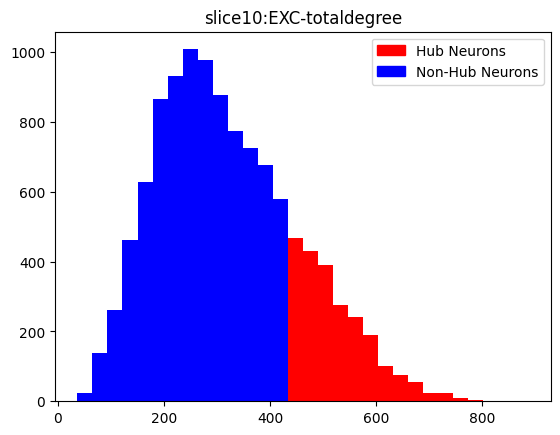

In [60]:
degree_type = 'total'
group = 'EXC'

if degree_type == 'in':
    n, bins, patches = plt.hist(indegrees_EXC,bins=30,color='blue')
    threshold = inhub_threshold_EXC
elif degree_type == 'out':
    n, bins, patches = plt.hist(outdegrees_EXC,bins=30,color='blue')
    threshold = outhub_threshold_EXC
elif degree_type == 'total':
    n, bins, patches = plt.hist(total_degrees_EXC,bins=30,color='blue')
    threshold = tothub_threshold_EXC

plt.title(f"{target}:{group}-{degree_type}degree")

red_patch = mpatches.Patch(color='red', label='Bins > Threshold')
plt.legend(handles=[red_patch])

# Iterate over the patches and set color for bins higher than the threshold
red_patches = []
non_red_patches = []
for i in range(len(patches)):
    if bins[i + 1] > threshold:
        patches[i].set_facecolor('red')
        red_patches.append(patches[i])
    else:
        non_red_patches.append(patches[i])

# Create legend patches
red_patch = mpatches.Patch(color='red', label='Hub Neurons')
non_red_patch = mpatches.Patch(color='blue', label='Non-Hub Neurons')

# Add the legend to the plot
plt.legend(handles=[red_patch, non_red_patch])
plt.savefig(f'{fig_save_dir}/{target}_{group}_syn_{degree_type}degree.{file_format}',dpi=dpi,format=file_format)
# plt.xscale('log')

# Powerlaw calculation

In [9]:
from graph_analysis.power_law import GraphAnalysis

In [10]:
save_dir = '../output/power_law/'
os.makedirs(save_dir, exist_ok=True)

In [11]:
analysis = GraphAnalysis(adj,'in')

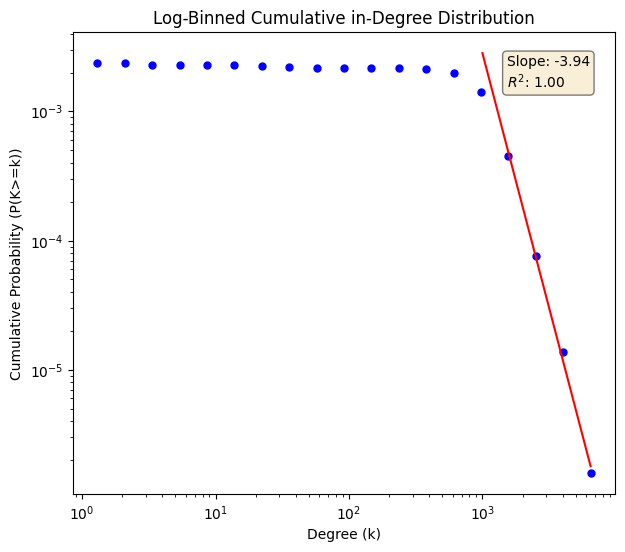

-3.9445247726116164

In [14]:
kind = 'in'
analysis.plot_log_binned_degree_distribution(kind, cumulative=True, title=None, fit_min_degree=1000,show_plot=True)

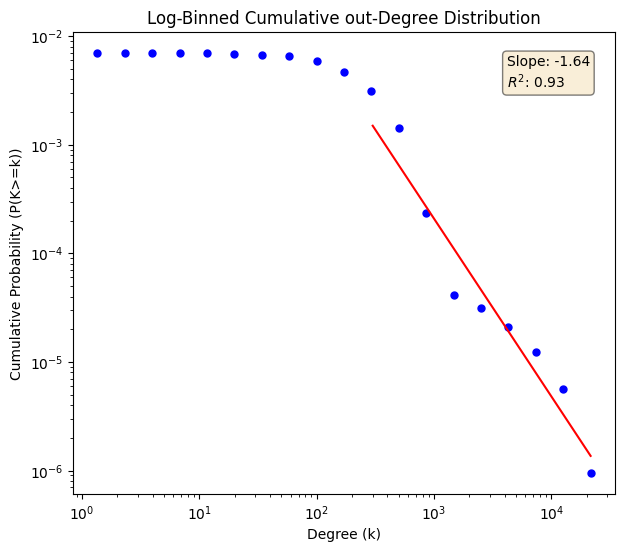

-1.637817419865886

In [15]:
kind = 'out'
analysis.plot_log_binned_degree_distribution(kind, cumulative=True, title=None, fit_min_degree=300,show_plot=True)

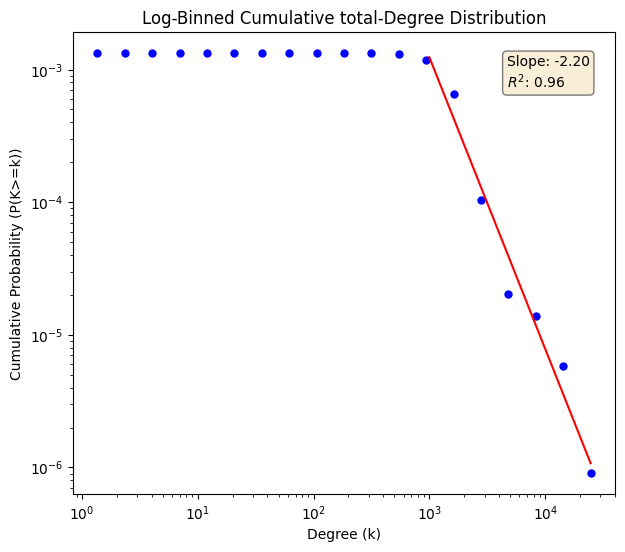

-2.1983840479032324

In [16]:
kind = 'total'
analysis.plot_log_binned_degree_distribution(kind, cumulative=True, title=None, fit_min_degree=1000,show_plot=True)

In [17]:
from bluepysnap import Circuit

In [18]:
adj_path = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/data/ca1_synaptome.npz'
synaptome = sparse.load_npz(adj_path)
CIRCUIT_DIR =  '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/sonata/circuit_config.json'
circuit = Circuit(CIRCUIT_DIR)
nodes = circuit.nodes["hippocampus_neurons"]
edges = circuit.edges["hippocampus_neurons__hippocampus_neurons__chemical_synapse"]

In [19]:
analysis_CA1 = GraphAnalysis(synaptome,'in')

In [49]:
def get_degree_exponent(adj, kind='in',use_ccdf=True):
    from scipy.stats import linregress

    if kind == 'in':
        strengths = adj.sum(axis=0).A1
    elif kind == 'out':
        strengths = adj.sum(axis=1).A1
    elif kind == 'total':
        strengths = adj.sum(axis=1).A1 + adj.sum(axis=0).A1

    strengths = np.sort(strengths)[::-1]

    if use_ccdf:
        ccdf = 1 - np.cumsum(strengths) / np.sum(strengths)

    log_strengths = np.log10(strengths)
    degrees = np.arange(1, len(strengths) + 1)

    if use_ccdf:
        slope, intercept, r_value, p_value, std_err = linregress(log_strengths, np.log(ccdf))
    else:
        slope, intercept, r_value, p_value, std_err = linregress(np.log10(degrees), log_strengths)
    scaling_exponent = -slope
    adjusted_exponent = scaling_exponent + 1

    return adjusted_exponent

In [36]:
gamma_in = get_degree_exponent(synaptome,'in')
gamma_out = get_degree_exponent(synaptome,'out')
gamma_tot = get_degree_exponent(synaptome,'total')

print(f'''In-degree exponent: {gamma_in}
Out-degree exponent: {gamma_out}
Total-degree exponent: {gamma_tot}''')

In-degree exponent: 1.4084673004789336
Out-degree exponent: 2.0041527094881983
Total-degree exponent: 1.6489259328683281


In [50]:
gamma_in = get_degree_exponent(synaptome,'in')
gamma_out = get_degree_exponent(synaptome,'out')
gamma_tot = get_degree_exponent(synaptome,'total')

print(f'''In-degree exponent: {gamma_in}
Out-degree exponent: {gamma_out}
Total-degree exponent: {gamma_tot}''')

/tmp/ipykernel_23016/3878153320.py:20: RuntimeWarning: divide by zero encountered in log
  slope, intercept, r_value, p_value, std_err = linregress(log_strengths, np.log(ccdf))
/gpfs/bbp.cscs.ch/home/kurban/venv2022/lib/python3.8/site-packages/numpy/lib/function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In-degree exponent: nan
Out-degree exponent: nan
Total-degree exponent: nan


In [41]:
strengths = synaptome.sum(axis=1).A1 + synaptome.sum(axis=0).A1
strengths = np.sort(strengths)[::-1]
log_strengths = np.log10(strengths)

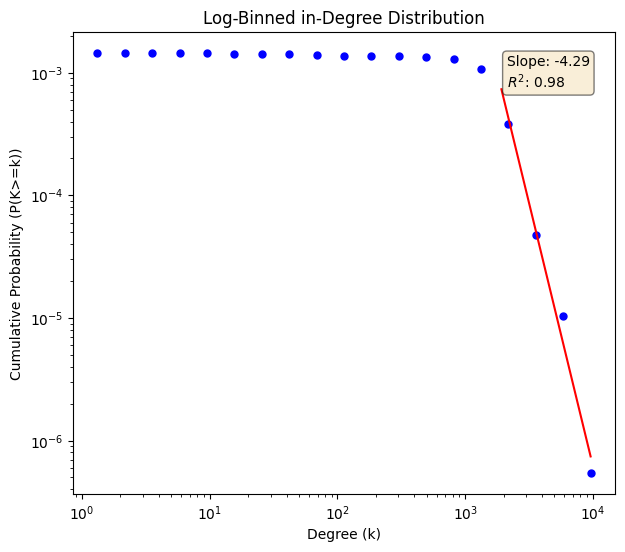

-4.2882926884475445

In [21]:
kind = 'in'
analysis_CA1.plot_log_binned_degree_distribution(kind, cumulative=True, title=f'Log-Binned {kind}-Degree Distribution', 
                                                 fit_min_degree=inhub_threshold,show_plot=True)

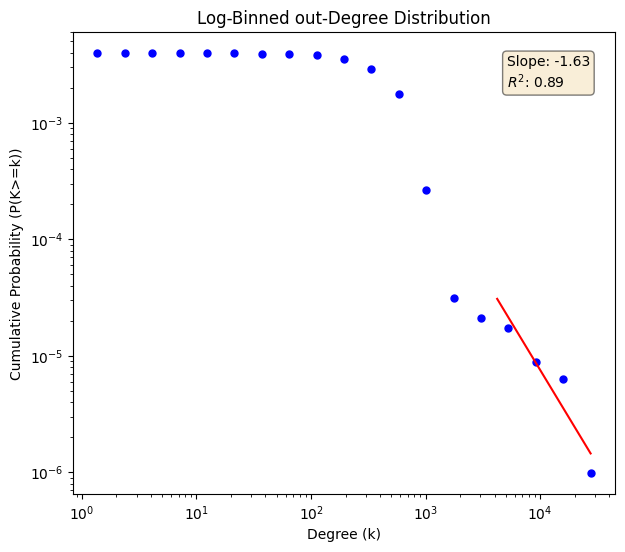

-1.6272655901014699

In [22]:
kind = 'out'
analysis_CA1.plot_log_binned_degree_distribution(kind, cumulative=True, title=f'Log-Binned {kind}-Degree Distribution', 
                                                 fit_min_degree=outhub_threshold,show_plot=True)

In [25]:
outdegrees.shape

(12615,)

In [29]:
np.testing.assert_equal(outdegrees.shape[0],outdegrees[outdegrees>0].shape[0])
np.testing.assert_equal(indegrees.shape[0],indegrees[indegrees>0].shape[0])
np.testing.assert_equal(total_degrees.shape[0],total_degrees[total_degrees>0].shape[0])

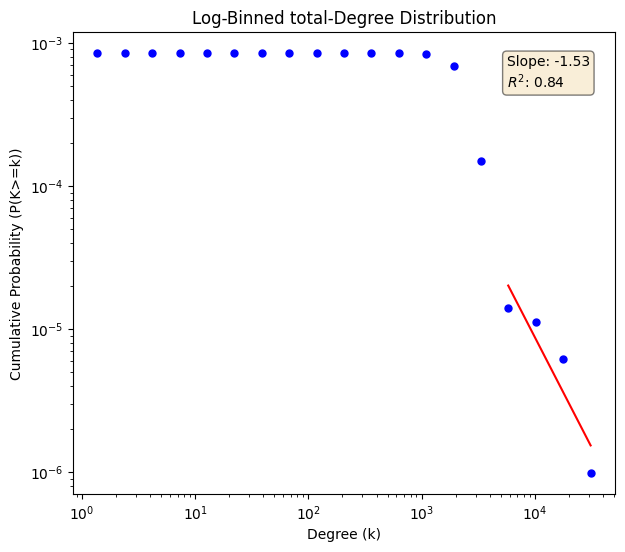

-1.534776200585666

In [23]:
kind = 'total'
analysis_CA1.plot_log_binned_degree_distribution(kind, cumulative=True, title=f'Log-Binned {kind}-Degree Distribution', 
                                                 fit_min_degree=tothub_threshold,show_plot=True)